In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

Load Data

In [59]:
df1 = pd.read_csv("laptopPrice.csv")
df1.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [60]:
df1.shape

(823, 19)

Clean Data
-check for missing values, replace with median
-check for duplicate values, drop
-check columns info: type, unique values

In [61]:
df1.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [62]:
df1.duplicated().sum()

21

In [63]:
df2 = df1.drop_duplicates()

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 1

In [65]:
df2.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    7
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                405
rating                 5
Number of Ratings    282
Number of Reviews    135
dtype: int64

In [66]:
df2.describe()

,Price,Number of Ratings,Number of Reviews
count,802.000000,802.00000,802.000000
mean,76625.543641,299.84414,36.089776
std,45232.984422,1001.78442,118.313553
min,16990.000000,0.00000,0.000000
25%,45990.000000,0.00000,0.000000
50%,63990.000000,17.00000,2.000000
75%,89525.000000,140.25000,18.000000
max,441990.000000,15279.00000,1947.000000


In [67]:
numeric_features = [feature for feature in df2.columns if df2[feature].dtype != 'object']
cat_features = [feature for feature in df2.columns if df2[feature].dtype == 'object']
print("Numerical features: ", numeric_features)
print("Categorical featues:", cat_features)

Numerical features:  ['Price', 'Number of Ratings', 'Number of Reviews']
Categorical featues: ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


In [68]:
def remove_outliers_ml(df, column):
    # Calculate quartiles
    q25, q75 = df[column].quantile(0.25), df[column].quantile(0.75)
    
    # Calculate IQR
    iqr = q75 - q25
    
    # Define upper and lower limits
    upper_limit = q75 + 1.5 * iqr
    lower_limit = q25 - 1.5 * iqr
    
    # Filter outliers
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    
    return df


In [69]:
df3 = remove_outliers(df2, 'Price')
df3 = remove_outliers(df3, 'Number of Ratings')
df3 = remove_outliers(df3, 'Number of Reviews')

In [70]:
df3.describe()

,Price,Number of Ratings,Number of Reviews
count,527.000000,527.000000,527.000000
mean,72235.751423,16.979127,1.998102
std,29280.929189,26.115376,3.015485
min,21990.000000,0.000000,0.000000
25%,49384.500000,0.000000,0.000000
50%,65556.000000,5.000000,0.000000
75%,86994.500000,23.500000,3.000000
max,151098.000000,170.000000,14.000000


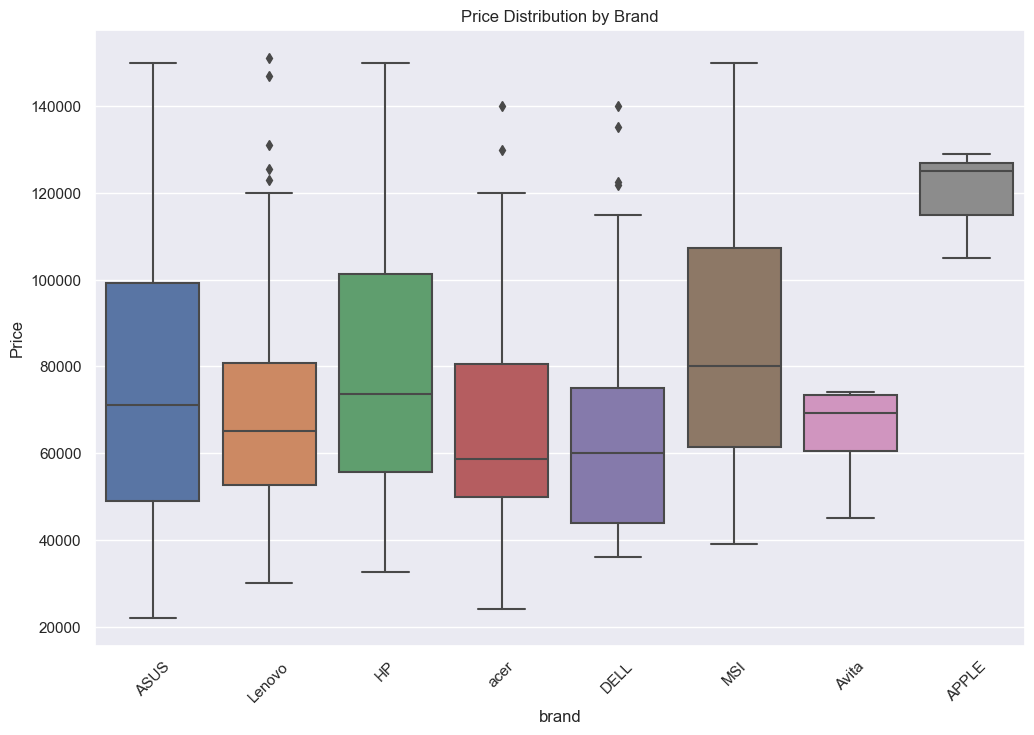

In [71]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='Price', data=df3)
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand')
plt.show()

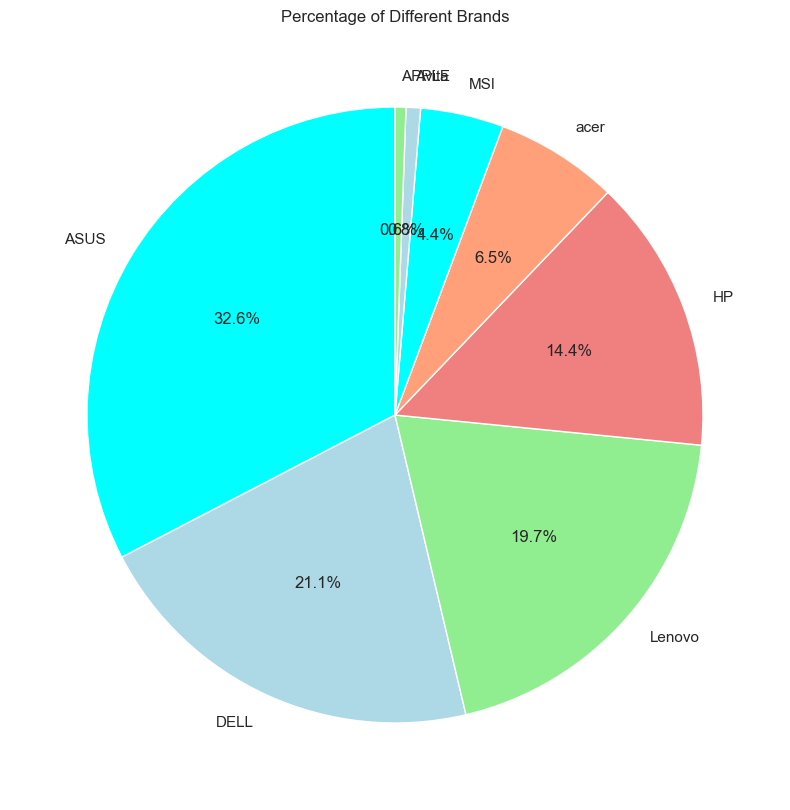

In [72]:
plt.figure(figsize=(10, 10))
df3['brand'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['cyan', 'lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Percentage of Different Brands')
plt.ylabel('')  # To remove the default 'count' label
plt.show()

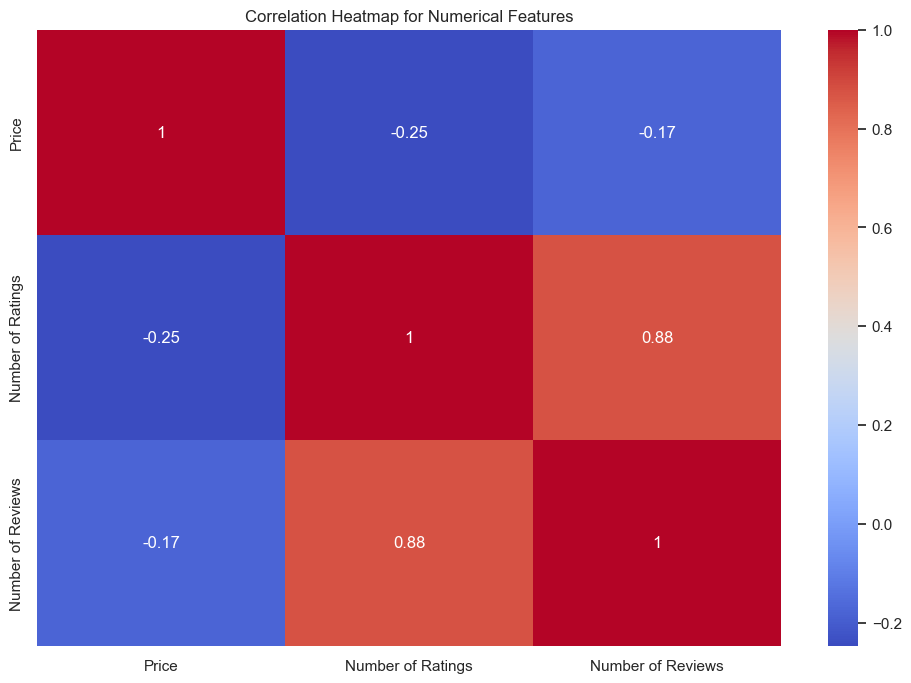

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(df3[['Price', 'Number of Ratings', 'Number of Reviews']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


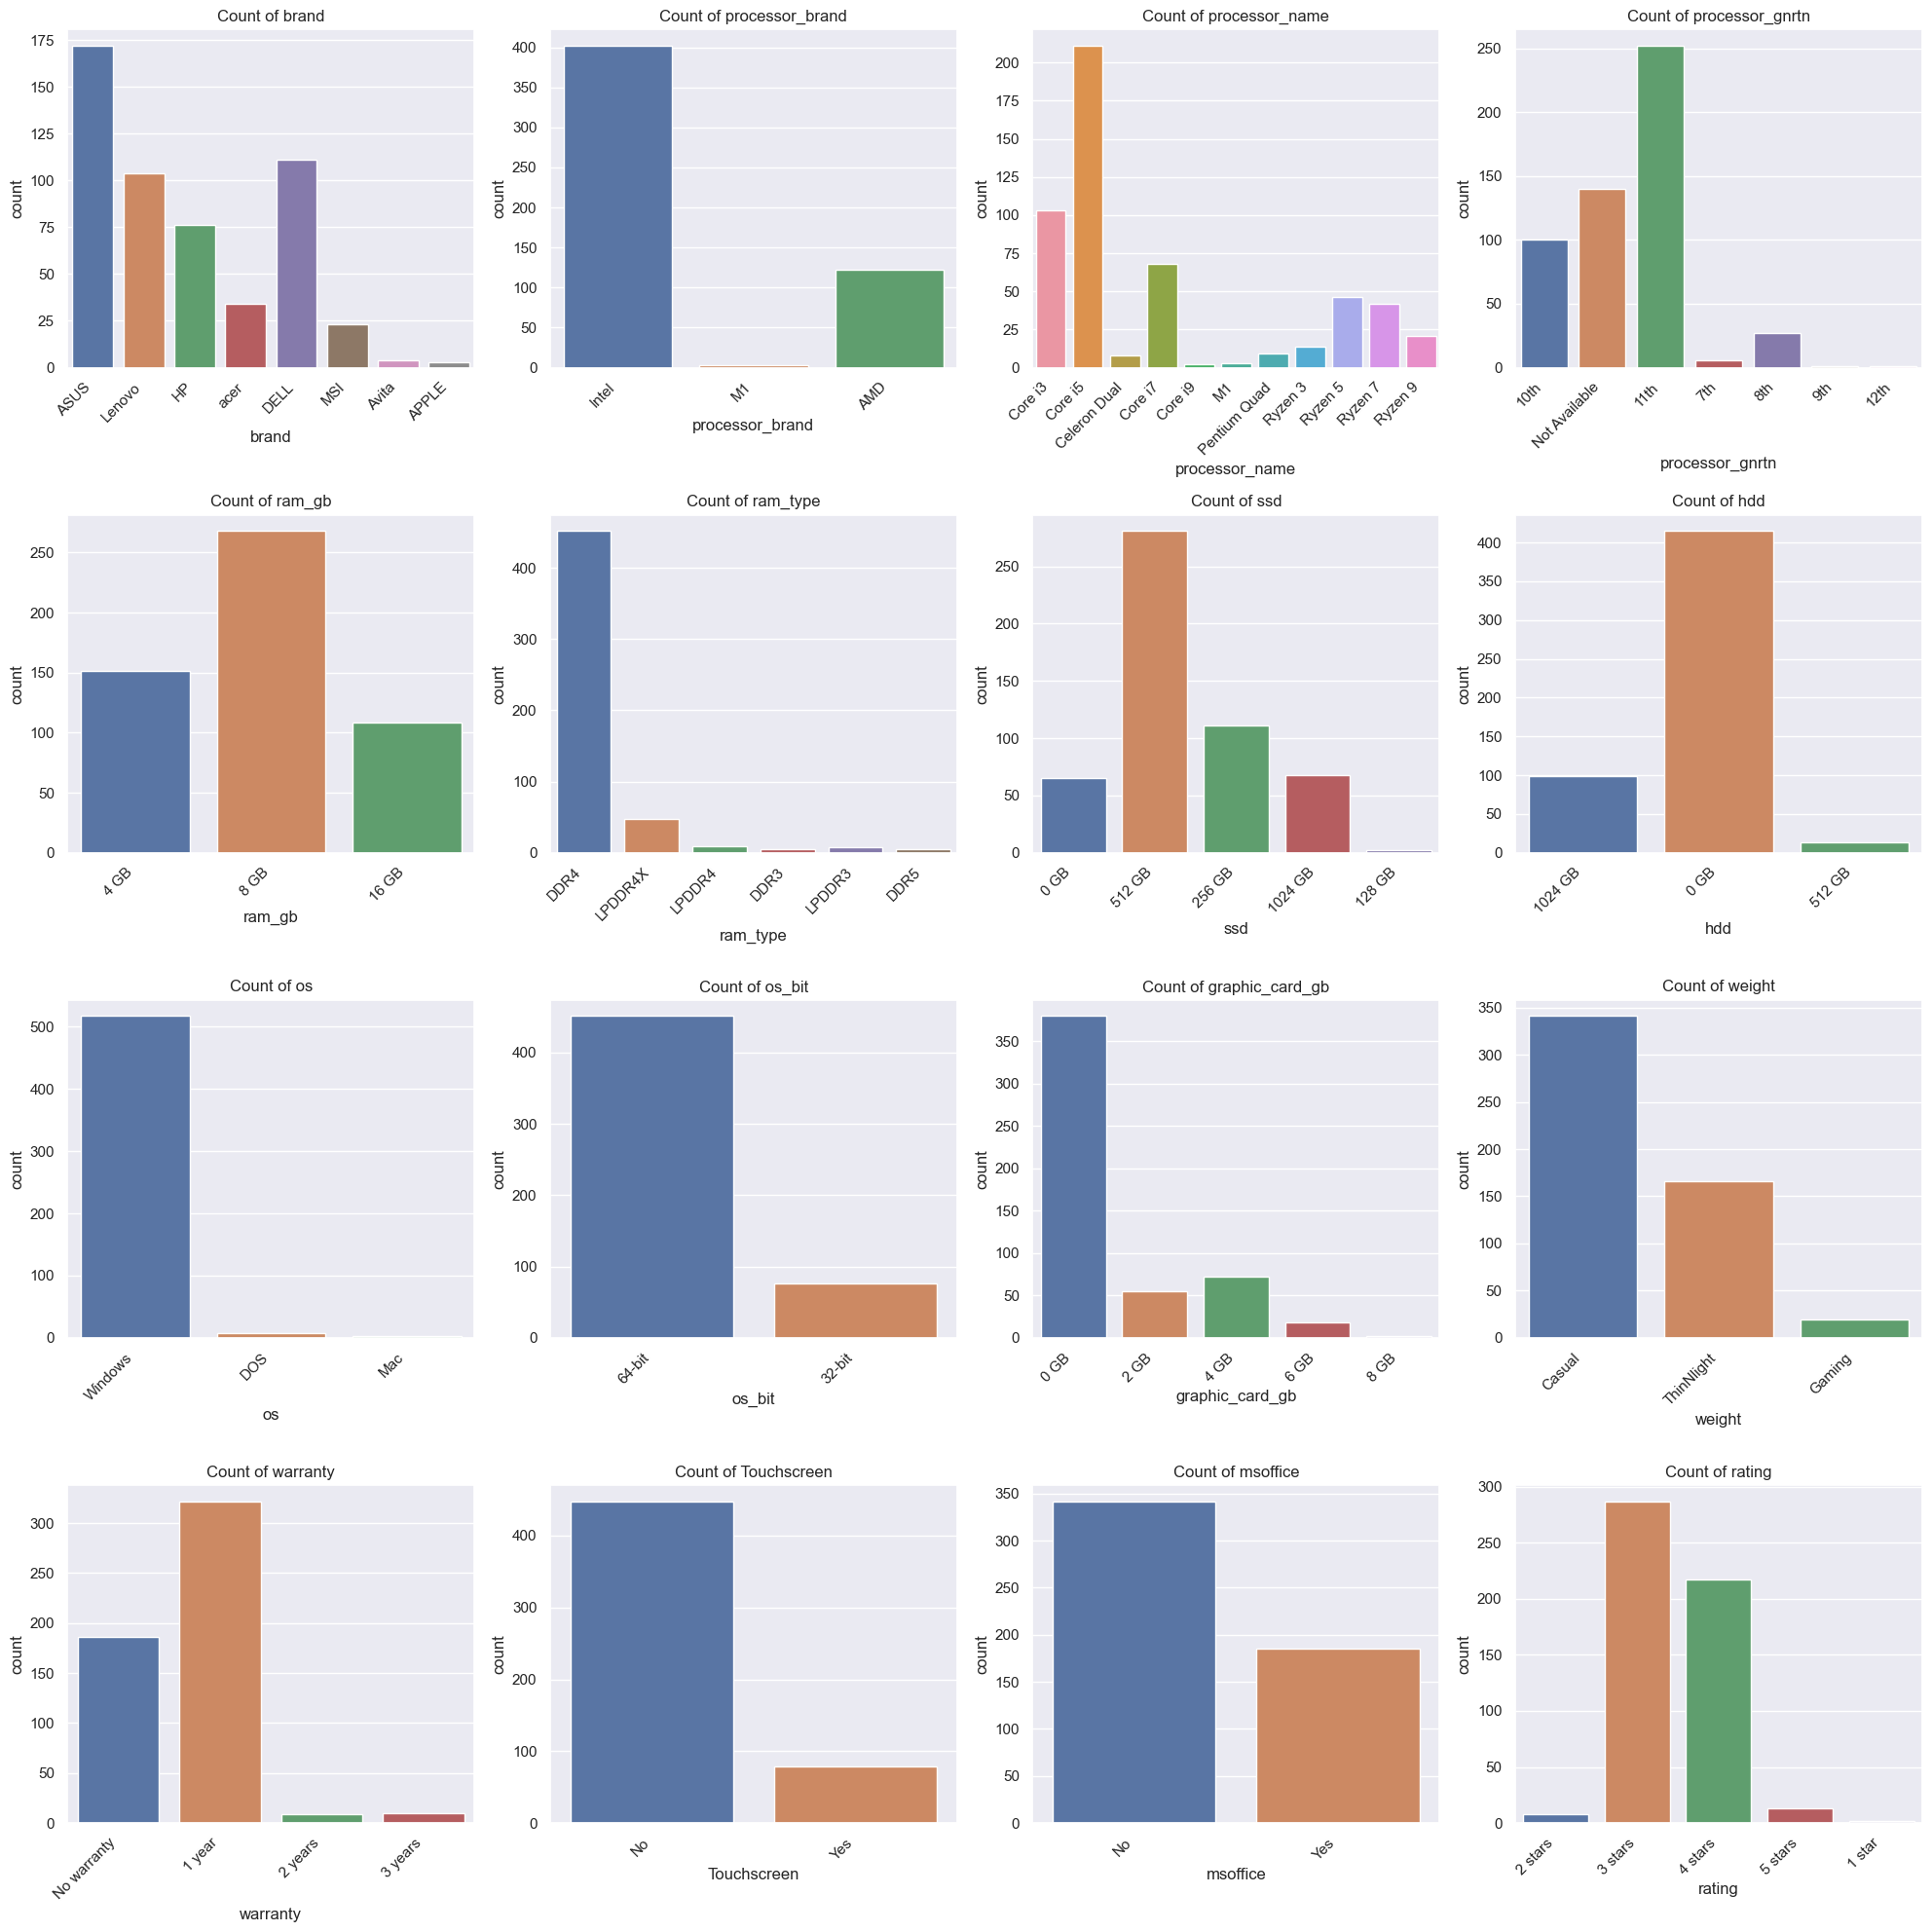

In [74]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, col in enumerate(df3[cat_features]):
    sns.countplot(x=col, data=df3, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Count of {col}')
    axes[i//4, i%4].set_xticklabels(axes[i//4, i%4].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


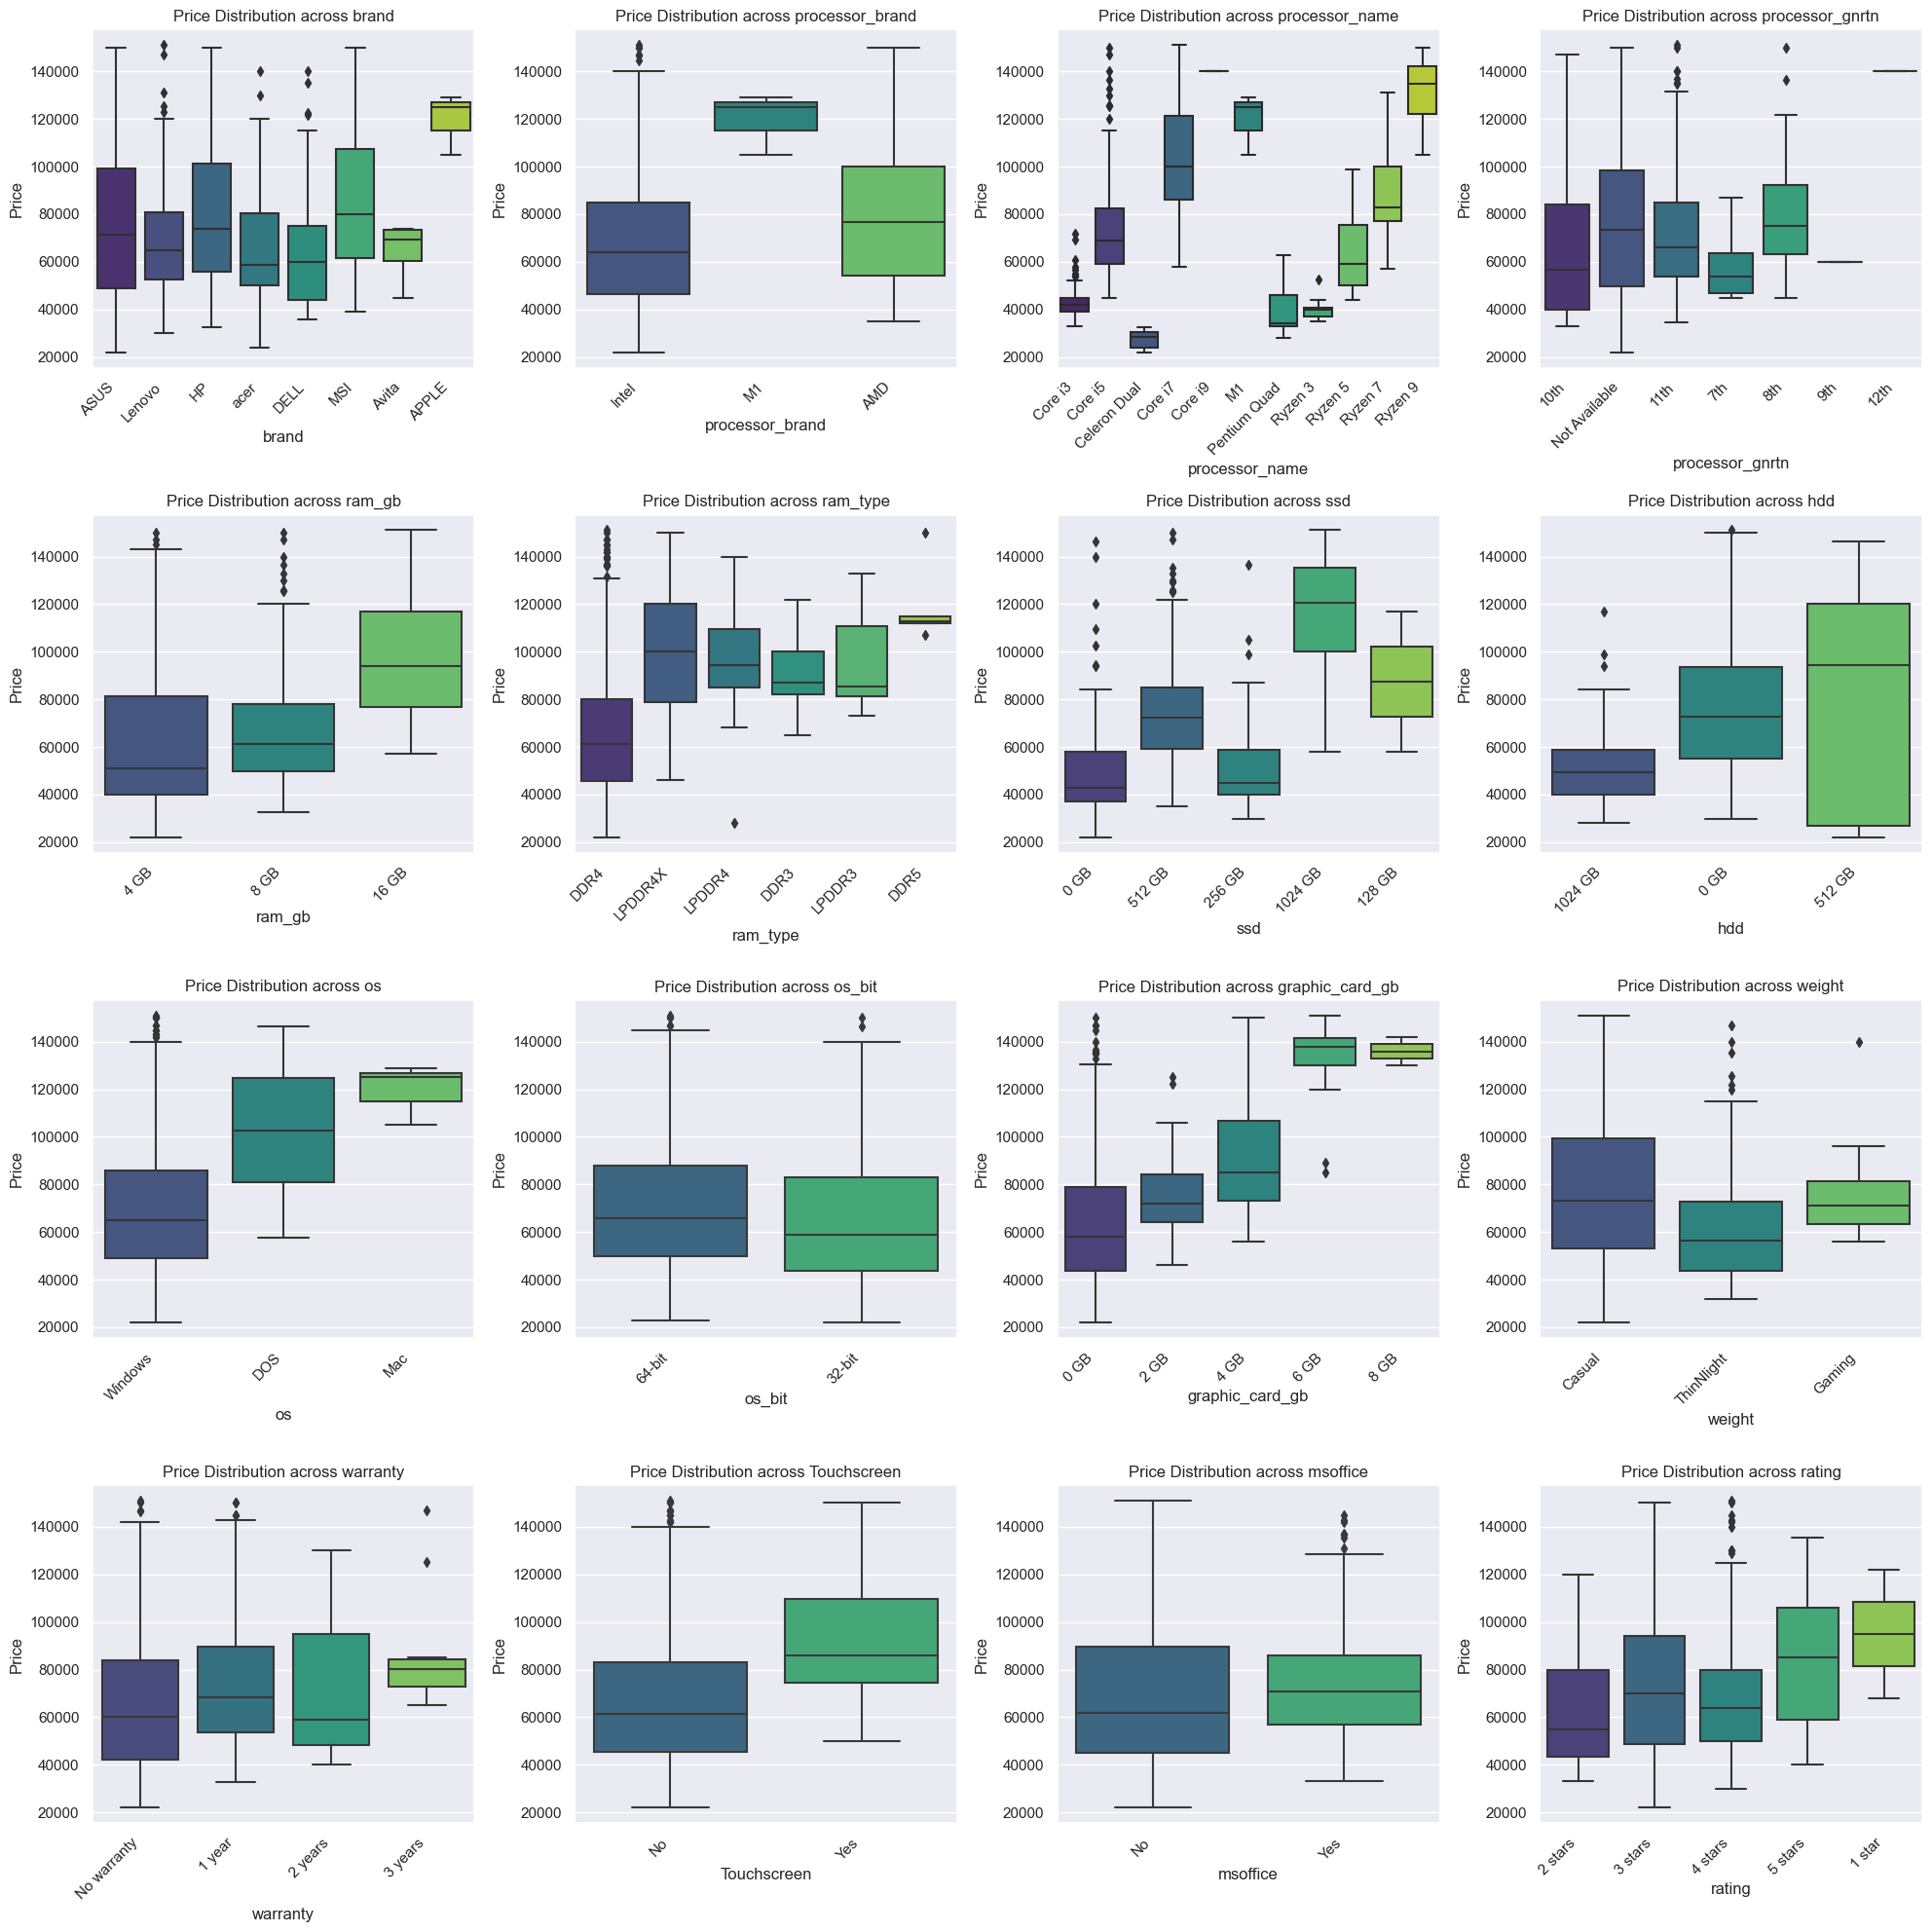

In [75]:
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Loop through categorical features
for i, col in enumerate(cat_features):
    # Create a box plot for Price within each category
    sns.boxplot(x=col, y='Price', data=df3, ax=axes[i//4, i%4], palette='viridis')
    axes[i//4, i%4].set_title(f'Price Distribution across {col}')
    axes[i//4, i%4].set_xticklabels(axes[i//4, i%4].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [76]:
class LogScaling(BaseEstimator, TransformerMixin):

    def fit(self, X):
        return self   

    def transform(self, X):
        return np.log1p(X)

In [77]:
class TransformationPipeline:

    def __init__(self) -> None:
        pass
    
    def preprocess(self):
        cat_cols = df3.select_dtypes('object').columns
        num_cols = ['Number of Ratings', 'Number of Reviews']

        num_pipeline= Pipeline(
            steps=[
            ("imputer",SimpleImputer(strategy="median")),
            ("scaler",StandardScaler())
            ]
        ) 

        cat_pipeline=Pipeline(
            steps=[
            ("imputer",SimpleImputer(strategy="most_frequent")),
            ("one_hot_encoder",OneHotEncoder()),
            ("scaler",StandardScaler(with_mean=False))
            ]
        )

        preprocessor = ColumnTransformer([
            ("log_transform", LogScaling(), num_cols),
            ("num_pipeline", num_pipeline, num_cols),
            ("cat_pipelines",cat_pipeline,cat_cols)
            ], remainder= 'passthrough')
        
        return preprocessor

In [78]:
X = df3.drop('Price', axis = 1)
y = df3.Price

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 10)
X_train.shape, X_test.shape

((421, 18), (106, 18))

In [99]:
from sklearn.linear_model import LinearRegression
preprocessor = TransformationPipeline().preprocess()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [100]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8078398064430103

In [104]:
from sklearn.metrics import mean_absolute_error
y_pred = lr_clf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 9590.436625341465


In [105]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 150088227.37675792


In [106]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 12251.05005200607


In [107]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')


R-squared Score: 0.8078398064430103


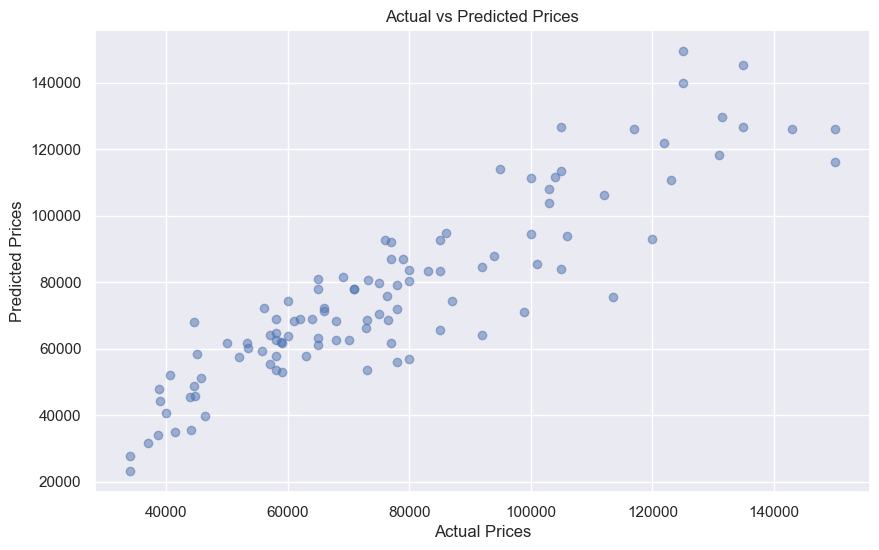

In [108]:

# Make predictions on the test set
y_pred = lr_clf.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [115]:
X.columns
X.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars,0,0


In [120]:
def predict_price(**feature_values):
    # Create a DataFrame with default values
    data = {
        'brand': ['ASUS'],
        'processor_brand': ['Intel'],
        'processor_name': ['Core i3'],
        'processor_gnrtn': ['10th'],
        'ram_gb': ['4 GB'],
        'ram_type': ['DDR4'],
        'ssd': ['0 GB'],
        'hdd': ['1024 GB'],
        'os': ['Windows'],
        'os_bit': ['64-bit'],
        'graphic_card_gb': ['0 GB'],
        'weight': ['Casual'],
        'warranty': ['No warranty'],
        'Touchscreen': ['No'],
        'msoffice': ['No'],
        'rating': ['2 stars'],
        'Number of Ratings': [16],
        'Number of Reviews': [2]
    }

    # Update values with provided feature_values
    for key, value in feature_values.items():
        if key in data:
            data[key][0] = value

    # Convert the dictionary to a DataFrame
    input_data = pd.DataFrame(data)

    # Preprocess the input data
    input_transformed = preprocessor.transform(input_data)

    # Make predictions
    predicted_price = lr_clf.predict(input_transformed)

    return predicted_price[0]


In [126]:
predicted_price = predict_price(brand = 'HP', processor_brand = 'Intel', processor_name = 'Core i3', processor_gnrtn = '11th', ram_gb = '8 GB', ram_type = 'DDR4', ssd = '256 GB', hdd = '0 GB', os = 'Windows', os_bit = '64-bit', graphic_card_gb = '0 GB', weight	= 'Casual', warranty = '1 year', Touchscreen = 'Yes', msoffice = 'No', rating = '3 stars', Number_of_Ratings = 4, Number_of_Reviews = 4)
print(f'Predicted Price: ${predicted_price:.2f}')
print(f'Actual Price: $56490')

Predicted Price: $59903.19
Actual Price: $56490


In [125]:
for column in df3.columns:
    unique_values = df3[column].unique()
    print(f'Unique values for column {column}:\n{unique_values}\n')


Unique values for column brand:
['ASUS' 'Lenovo' 'HP' 'acer' 'DELL' 'MSI' 'Avita' 'APPLE']

Unique values for column processor_brand:
['Intel' 'M1' 'AMD']

Unique values for column processor_name:
['Core i3' 'Core i5' 'Celeron Dual' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 5' 'Ryzen 7' 'Ryzen 9']

Unique values for column processor_gnrtn:
['10th' 'Not Available' '11th' '7th' '8th' '9th' '12th']

Unique values for column ram_gb:
['4 GB' '8 GB' '16 GB']

Unique values for column ram_type:
['DDR4' 'LPDDR4X' 'LPDDR4' 'DDR3' 'LPDDR3' 'DDR5']

Unique values for column ssd:
['0 GB' '512 GB' '256 GB' '1024 GB' '128 GB']

Unique values for column hdd:
['1024 GB' '0 GB' '512 GB']

Unique values for column os:
['Windows' 'DOS' 'Mac']

Unique values for column os_bit:
['64-bit' '32-bit']

Unique values for column graphic_card_gb:
['0 GB' '2 GB' '4 GB' '6 GB' '8 GB']

Unique values for column weight:
['Casual' 'ThinNlight' 'Gaming']

Unique values for column warranty:
['No warranty

In [127]:
import pickle
with open('laptop_price_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [128]:
import json
columns = {'data_columns' : [col.lower() for col in X.columns]
          }
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))